,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


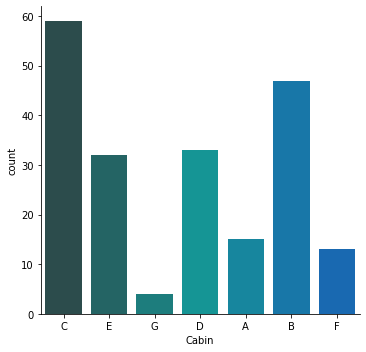

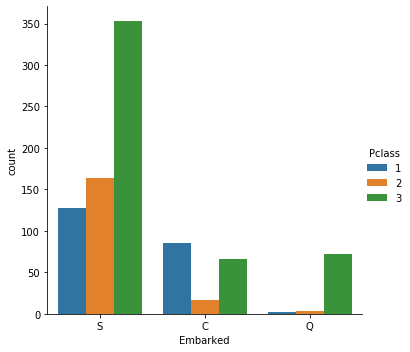

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv(r'C:\Users\Nikhil\Downloads\train.csv')
titanic_df = pd.DataFrame(data)
def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else:
        return sex

titanic_df['Person'] =titanic_df[['Age','Sex']].apply(male_female_child,axis = 1)
titanic_df.head(10)
titanic_df['Age'].mean()
deck = titanic_df['Cabin'].dropna()
deck.head()
levels = []
for level in deck:
    levels.append(level[0])
cabin_df = pd.DataFrame(levels,columns = ['Cabin'])
cabin_df = cabin_df[cabin_df != 'T']
sns.factorplot('Cabin',data = cabin_df,palette='winter_d',kind ='count',)
sns.factorplot('Embarked',data = titanic_df,hue='Pclass',kind='count')
#4) Who was with Family and who was alone?
titanic_df['Alone'] = titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'
titanic_df.head()
    

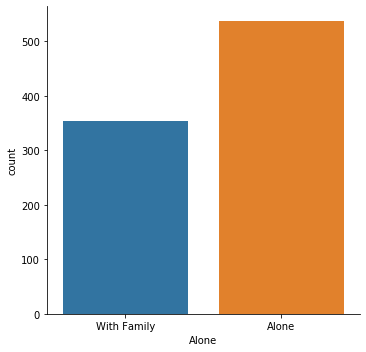

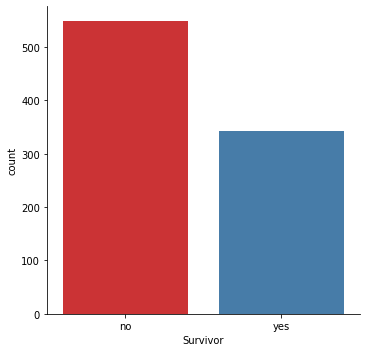

In [11]:
sns.factorplot('Alone',data=titanic_df,kind='count')
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})
sns.factorplot('Survivor',data=titanic_df,palette='Set1',kind='count')


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


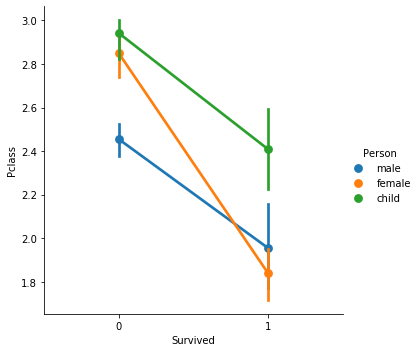

In [17]:
sns.factorplot('Survived','Pclass',hue='Person',data=titanic_df,)

In [18]:

from IPython.display import Image
Image(url='http://i.imgur.com/DGNjT.gif')